<a href="https://colab.research.google.com/github/Mohit1-K/Plant-Disease-prediction/blob/main/Plant_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing necessary modules.**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import glob

### Loading one sample image.

In [2]:
image2 = image.load_img("/content/drive/MyDrive/Work/train/Peach Diseased/image (1).JPG")

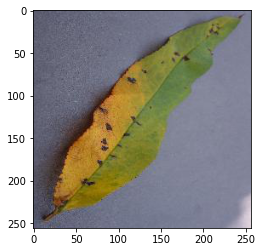

In [3]:
plt.imshow(image2)

In [4]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

### **Loading dataset and converting them to 0 & 1 representation.**

In [10]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Work/train',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

validation_dataset = train.flow_from_directory('/content/drive/MyDrive/Work/validation',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory('/content/drive/MyDrive/Work/test',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')


Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'Peach Diseased': 0, 'Peach Healthy': 1}

## **Creating model.**

In [7]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200,200,3)),
                            tf.keras.layers.MaxPool2D(2,2),
                             
                            tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                             
                            tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                            tf.keras.layers.MaxPool2D(2,2),
                             
                            tf.keras.layers.Flatten(),
                                                          
                            tf.keras.layers.Dense(512, activation = 'relu'),
                            
                            tf.keras.layers.Dense(1, activation = 'sigmoid')
                            
                            ])

In [8]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

### Fitting train and validation data into model.

In [9]:
fitted_model = model.fit(train_dataset,
                         epochs = 10,
                         validation_data = validation_dataset)

Epoch 1/10
100/100 [==============================] - 145s 1s/step - loss: 1.7281 - accuracy: 0.6543 - val_loss: 0.5802 - val_accuracy: 0.8567
Epoch 2/10
100/100 [==============================] - 56s 558ms/step - loss: 0.3859 - accuracy: 0.9371 - val_loss: 0.2784 - val_accuracy: 0.9200
Epoch 3/10
100/100 [==============================] - 58s 576ms/step - loss: 0.2008 - accuracy: 0.9415 - val_loss: 0.4774 - val_accuracy: 0.8800
Epoch 4/10
100/100 [==============================] - 55s 548ms/step - loss: 0.5118 - accuracy: 0.9657 - val_loss: 0.5548 - val_accuracy: 0.8900
Epoch 5/10
100/100 [==============================] - 54s 538ms/step - loss: 0.1531 - accuracy: 0.9850 - val_loss: 0.5863 - val_accuracy: 0.8300
Epoch 6/10
100/100 [==============================] - 52s 522ms/step - loss: 0.0655 - accuracy: 0.9909 - val_loss: 0.9264 - val_accuracy: 0.8500
Epoch 7/10
100/100 [==============================] - 58s 578ms/step - loss: 0.0301 - accuracy: 0.9812 - val_loss: 0.9158 - val_accu